# TSARNN Homework 7 - Maximilian Rokuss and Julius Meyer-Ohlendorf



General remark:

 During the last two exercise sheets we noticed that tasks were covered that then only appeared in the following lecture after the uploading date of the sheet.

-sheet 6: more on fixed points, bifurcation

-sheet 7: RNNs were only roughly introduced yet and the training process is supposed to appear in the next lecture.

It would be great, if the following sheets would again cover things that were already introduced in previous lectures. Thank you :)

#**Task 1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##1 a)

Parameter Set 1


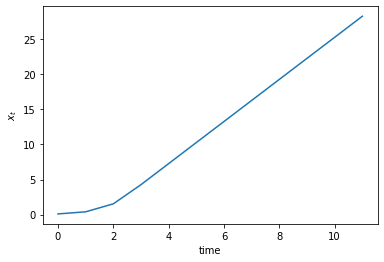

Parameter Set 2


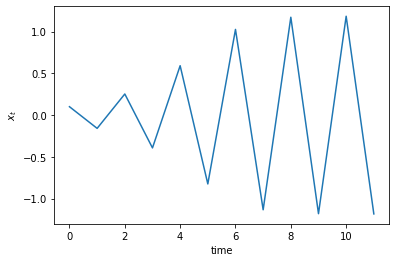

Parameter Set 3


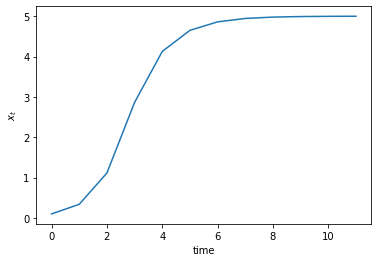

Parameter Set 4


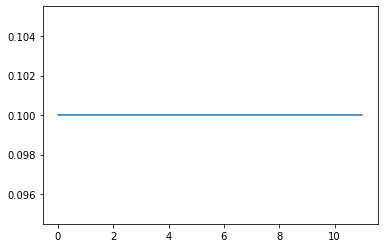

In [ ]:
N = 12
ab = np.array([[1,3],[0.4,-2],[0.4,3],[1,0]])
x = np.zeros((4,N))

# initial condition
x[:,0] = 0.1

for k in range(4):
  for t in range(N-1):
    x[k,t+1] = ab[k,0] * x[k,t] + ab[k,1] * np.tanh(x[k,t])
 
print("Parameter Set 1")
plt.plot(x[0])
plt.xlabel('time')
plt.ylabel(r'$x_t$')
plt.show()

print("Parameter Set 2")
plt.plot(x[1])
plt.xlabel('time')
plt.ylabel(r'$x_t$')
plt.show()

print("Parameter Set 3")
plt.plot(x[2])
plt.xlabel('time')
plt.ylabel(r'$x_t$')
plt.show()

print("Parameter Set 4")
plt.plot(x[3])
plt.show()

Paramter Set  1 : 


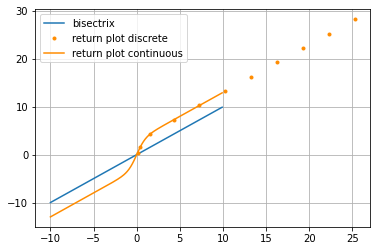

Paramter Set  2 : 


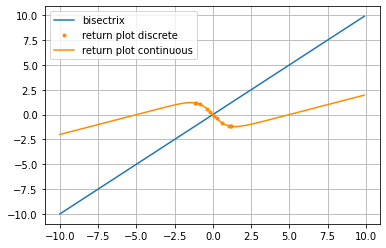

Paramter Set  3 : 


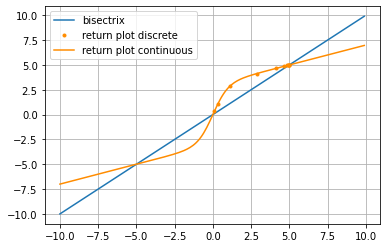

Paramter Set  4 : 


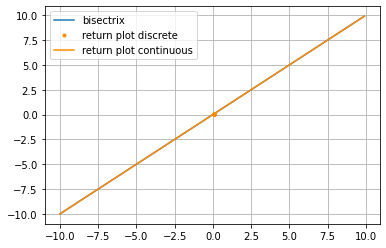

In [ ]:
### Return plots

xaxis = np.arange(-10.0,10.0,0.1)
yaxis = np.arange(-10.0,10.0,0.1)

for k in range(4):
  print("Paramter Set ", k+1, ": ")
  plt.plot(xaxis,yaxis, label="bisectrix")
  plt.plot(x[k,:-1],x[k,1:], '.', color='darkorange', label="return plot discrete")
  plt.plot(xaxis,ab[k,0]*xaxis + ab[k,1]*np.tanh(xaxis), color='darkorange', label="return plot continuous")
  plt.legend()
  plt.grid()
  plt.show()


In general one can see, that $0$ is a fix point for all parameters.

#### First plot:

$0$ is only (unstable - determined by slope comparison) fix point.

#### Second plot:

$0$ is only first order fix point(stability unclear as |slope| ~ 1). But one observes oscillation between two second order fix points.

#### Third plot:

$0$ unstable fix point and two stable fix points at around $x = \pm 5$

#### Fourth plot

Every point is a fix point (line attractor).

##1 b)

Parameter Set 1


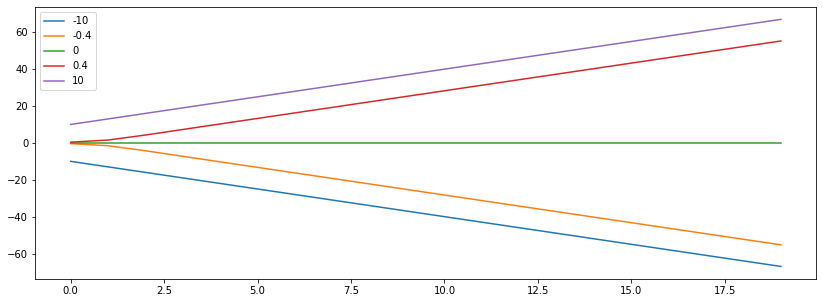

In [ ]:
N = 20
ab = np.array([[1,3],[0.4,-2],[0.4,3],[1,0]])
x = np.zeros((4,N))
plt.figure(figsize=(14,5))

for initial in [-10,-0.4,0,0.4,10]:
  x[:,0] = initial
  for k in range(4):
    for t in range(N-1):
      x[k,t+1] = ab[k,0]*x[k,t] + ab[k,1]*np.tanh(x[k,t])
  plt.plot(x[0])


lables = ["-10", "-0.4","0","0.4","10"]
plt.legend(lables)
print("Parameter Set 1")
plt.show()


Parameter Set 2


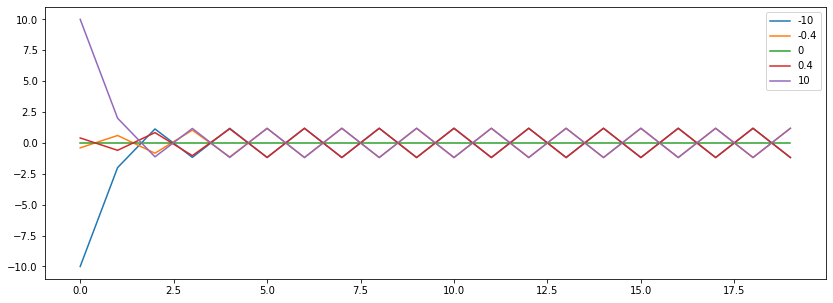

In [ ]:
N = 20
ab = np.array([[1,3],[0.4,-2],[0.4,3],[1,0]])
x = np.zeros((4,N))
plt.figure(figsize=(14,5))

for initial in [-10,-0.4,0,0.4,10]:
  x[:,0] = initial
  for k in range(4):
    for t in range(N-1):
      x[k,t+1] = ab[k,0]*x[k,t] + ab[k,1]*np.tanh(x[k,t])
  plt.plot(x[1])


lables = ["-10", "-0.4","0","0.4","10"]
plt.legend(lables)
print("Parameter Set 2")
plt.show()

Parameter Set 3


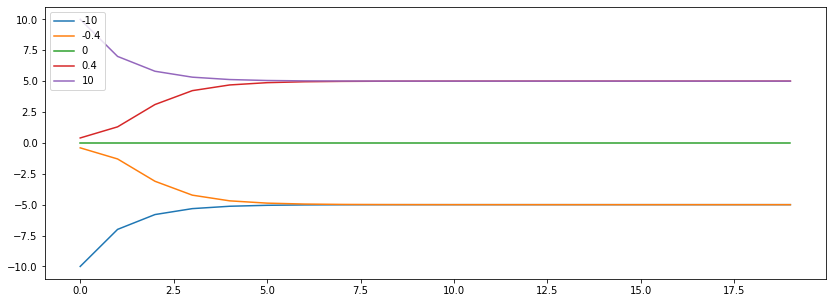

In [ ]:
N = 20
ab = np.array([[1,3],[0.4,-2],[0.4,3],[1,0]])
x = np.zeros((4,N))
plt.figure(figsize=(14,5))

for initial in [-10,-0.4,0,0.4,10]:
  x[:,0] = initial
  for k in range(4):
    for t in range(N-1):
      x[k,t+1] = ab[k,0]*x[k,t] + ab[k,1]*np.tanh(x[k,t])
  plt.plot(x[2])


lables = ["-10", "-0.4","0","0.4","10"]
plt.legend(lables)
print("Parameter Set 3")
plt.show()

Parameter Set 4


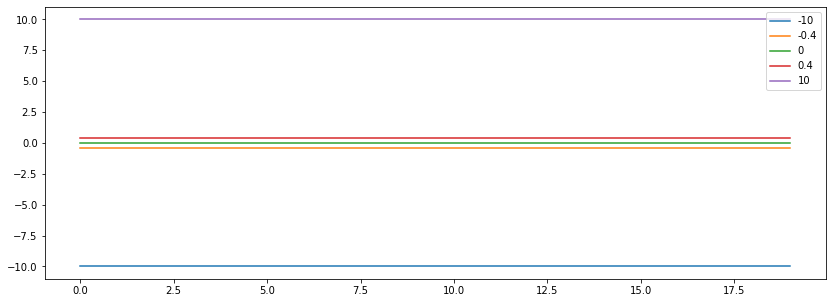

In [ ]:
N = 20
ab = np.array([[1,3],[0.4,-2],[0.4,3],[1,0]])
x = np.zeros((4,N))
plt.figure(figsize=(14,5))

for initial in [-10,-0.4,0,0.4,10]:
  x[:,0] = initial
  for k in range(4):
    for t in range(N-1):
      x[k,t+1] = ab[k,0]*x[k,t] + ab[k,1]*np.tanh(x[k,t])
  plt.plot(x[3])


lables = ["-10", "-0.4","0","0.4","10"]
plt.legend(lables)
print("Parameter Set 4")
plt.show()

##1 c)

In [ ]:
### Compute fix points for parameter set 3

from scipy.optimize import fsolve

def func(x):
    return 0.4*x + 3*np.tanh(x) - x

root1 = fsolve(func, -10)
root2 = fsolve(func, 0)
root3 = fsolve(func, -10)

print("Roots: ", root1, root2, root3)

Roots:  [-4.99954561] [0.] [-4.99954561]


Analytically: <br>
$\frac{d}{dx}f(x,0.4,3)=0.4+3(\frac{1}{e^{x}+e^{-x}})^2$

i)$\frac{d}{dx}f(x=\pm 5,0.4,3)\approx 0.4 < 1$ --> stable fix points

ii) $\frac{d}{dx}f(x=0,0.4,3)=3.4 > 1$ --> unstable fix point

# **Task 2 RNN**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

We put the given code into a function $training()$, in order to call it for different learning rates $\alpha$ and neurons $N$.

In [ ]:
#comments GK:
    #some comments:
      #torch works with tensors (multidimensional arrays)
      #torch tensors have very similar functions as numpy objects
      #PyTorch allows flexible code and debugging
      #autograd (automatic gradient) keeps track of all gradients for you
      #PyTorch builds the network dynamically, allows you to change it also dynamically

def training(N, alpha, activation, plot_results=False):
  '''
  Returns the loss array from the training
  '''
  #%%
  T = 10          # Length of time series
  Tinp = 3        # Time at which the input is presented
  Tout = [7]      # Time points at which the output is required
  #N = 10           # Number of neurons
  N = N
  Ntrial = 6000   # Number of trials
  #alpha = alpha     # learning rate
  alpha = 0.1     # learning rate
  batchsize = 5   # how many trials per training step?

  # Create 1 layer RNN with N neurons
  # Inputs to RNN: 
  # No. of input units, No. of total units, No. of layers, nonlinearity
  net = nn.RNN(N, N, 1, nonlinearity=activation)
  #net = nn.RNN(N, N, 1, nonlinearity='tanh')
  #net = nn.RNN(N, N, 1, nonlinearity='relu')

  #%%
  # Define the inputs for one trial:
  # Inputs to the RNN need to have 3 dimensions, where the first dimension is
  # the length of the time series, the second is the trial number and the third
  # is the number of the unit that receives the input. Here, we define the input
  # for one single trial, so we set the 2nd dimension to 1
  input1 = np.zeros([T,1,N])
  input2 = np.zeros([T,1,N])
  input1[Tinp,0,0] = 1   # Provide input to neuron 0
  input2[Tinp,0,1] = 1   # Provide input to neuron 1

  # Define the targets for a single trial
  target1 = np.zeros([T,1,N])
  target2 = np.zeros([T,1,N])
  for t in Tout:
      target1[Tout,0,3] = 1
      target2[Tout,0,2] = 1
  inputs  = {0: input1, 1: input2}
  targets = {0: target1, 1: target2}


  # We want to record losses for plotting
  losses = np.zeros(Ntrial)   
  # Define the loss function. We want to use mean square error function
  criterion = nn.MSELoss()
  for i in range(Ntrial):
      # First, stitch multiple input-target pairs together to one batch
      # Notice that the trial number within one batch is given by the second
      # dimension of the input/target tensor!
      inpt    = torch.zeros(T,batchsize,N, dtype=torch.float)
      target  = torch.zeros(T,batchsize,N, dtype=torch.float)
      for n in range(batchsize):
          # Draw randomly from either trial type 1 or trial type 2
          trial_type      = np.random.randint(0,2)
          inpt[:,n,:]     = torch.tensor(inputs[trial_type], dtype=torch.float).squeeze()
          target[:,n,:]   = torch.tensor(targets[trial_type], dtype=torch.float).squeeze()
          
      # To propagate input through the network, we simply call the network with
      # the input as argument. Output is the whole time series for all trials in
      # the batch
      [outp, _] = net(inpt)
      
      # Calculate MSE between output and target. Here we specifically select
      # those units (2 and 3) and time points (Tout) that have target outputs.
      loss = criterion(outp[Tout,:,2:4], target[Tout,:,2:4])
      losses[i] = loss
      
      # We need to reset the gradients from previous step to zero:
      net.zero_grad()
      
      # This function backpropagates the loss through the network. PyTorch takes 
      # care of calculating the gradients that are created by the backpropagation
      loss.backward()
      
      # Use the optimizer on the parameters, with learning rate alpha
      # We use stochastic gradient descent, but you can change it if you want:
      optimizer = optim.SGD(net.parameters(), lr=alpha)
      # Finally, do one gradient descent step:
      optimizer.step()

  if plot_results:
    # Now we plot the results. For that, we propagate both input types through the
    # network and plot the resulting time series
    plt.subplot(3,1,1)
    plt.plot(losses)
    inputs_dict  = {0: input1, 1: input2}
    targets_dict = {0: target1, 1: target2}
    for i in range(2):
        inpt = torch.tensor(inputs_dict[i], dtype=torch.float)
        
        [outp, _] = net(inpt)
        outp = outp.detach().numpy()
        x3 = np.squeeze(outp[:,0,2])
        x4 = np.squeeze(outp[:,0,3])
        plt.subplot(3,1,i+2)
        plt.plot(range(T), x3)
        plt.plot(range(T), np.zeros(T), 'k--', alpha=0.3)
        plt.plot(range(T), np.ones(T), 'k--', alpha=0.3)
        plt.plot(range(T), x4)
        plt.plot(range(T), np.zeros(T), 'k--', alpha=0.3)
        plt.plot(range(T), np.ones(T), 'k--', alpha=0.3)
  

  return(losses)


With the given paramters $\alpha=0.1$ and neurons $N=10$ we let the training process run and also plot the resulting time series.

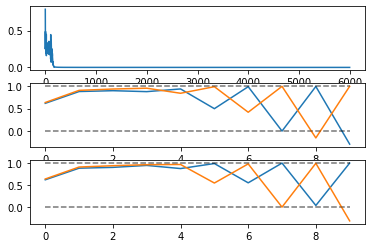

In [ ]:
losses = training(10, 0.1, 'tanh', plot_results=True)

The following function is used to plot the loss from the training process for different learning rates $\alpha$.

In [ ]:
def plotting_func(losses_arr, N, activation, logscale=True):
  '''
  Produces plot of the losses during training for the different learning rates
  '''
  plt.figure(figsize=(12,6))
  plt.title('N={0},  activation: {1}()'.format(N, activation))
  plt.ylabel('loss')
  plt.plot(losses_arr[0], label=r"$\alpha=10^{-5}$")
  plt.plot(losses_arr[1], label=r"$\alpha=10^{-4}$")
  plt.plot(losses_arr[2], label=r"$\alpha=10^{-3}$")
  plt.plot(losses_arr[3], label=r"$\alpha=10^{-2}$")
  plt.plot(losses_arr[4], label=r"$\alpha=10^{-1}$")
  plt.plot(losses_arr[5], label=r"$\alpha=10^{-0}$")
  if logscale:
    plt.yscale('log')
  plt.legend()
  plt.grid()
  plt.show()

We decided to test the following learning rates : $\alpha =[10^{-5}, 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}, 10^{-0}]$

In [ ]:
# different alpha values for training
alpha_arr = np.array([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e-0])

#### i) First case: N=10, activation: tanh 

In [ ]:
losses_N10_tanh = []

# loop over learning rates
for alpha in alpha_arr:

  losses = training(10, alpha, 'tanh')
  losses_N10_tanh.append(losses)

losses_N10_tanh = np.array(losses_N10_tanh)

# taking the mean of the last 10 loss values during training
mean_N10_tanh = np.mean(losses_N10_tanh[:,-10:], axis=1)

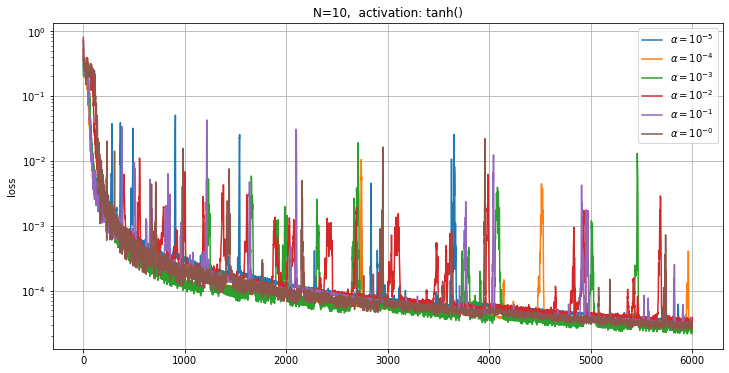

In [ ]:
# plotting loss
plotting_func(losses_N10_tanh, 10, 'tanh')

In general, the loss function converges quite well for all learning rates. But for some learning rates, there exist spikes during the whole training process. This could possible be resolved, if the batchsize was increased.

#### ii) First case: N5, activation: tanh 

In [ ]:
losses_N5_tanh = []

for alpha in alpha_arr:

  losses = training(5, alpha, 'tanh')
  losses_N5_tanh.append(losses)

losses_N5_tanh = np.array(losses_N5_tanh)

# mean loss values
mean_N5_tanh = np.mean(losses_N5_tanh[:,-10:], axis=1)


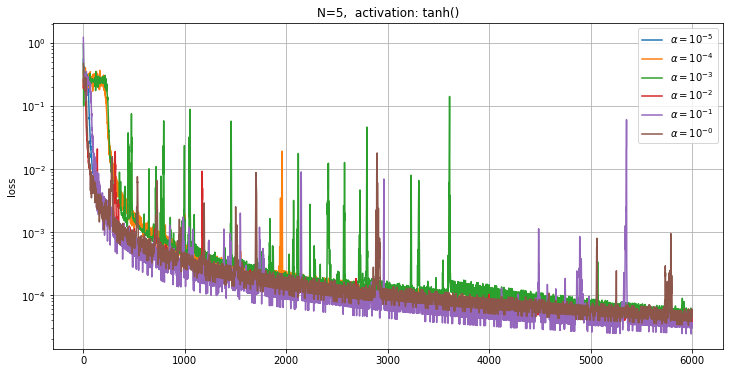

In [ ]:
plotting_func(losses_N5_tanh, 5, 'tanh')

Compared to the previous case that loss function does converges similarly well for all learning rates. Furthermore, there appear to be less spikes.

#### iii) Third case: N=10, activation: relu 

In [ ]:
losses_N10_relu = []

for alpha in alpha_arr:

  losses = training(10, alpha, 'relu')
  losses_N10_relu.append(losses)

losses_N10_relu = np.array(losses_N10_relu)

# mean loss values
mean_N10_relu = np.mean(losses_N10_relu[:,-10:], axis=1)

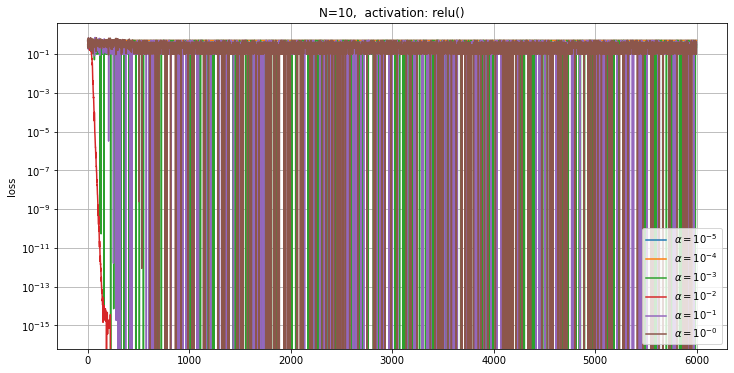

In [ ]:
plotting_func(losses_N10_relu, 10, 'relu', logscale=True)

It is clearly visible that for some learning rates the loss function did not converge.

#### iv) Fourth case: N=5, activation: relu 

In [ ]:
losses_N5_relu = []

for alpha in alpha_arr:

  losses = training(5, alpha, 'relu')
  losses_N5_relu.append(losses)

losses_N5_relu = np.array(losses_N5_relu)

# mean values
mean_N5_relu = np.mean(losses_N5_relu[:,-10:], axis=1)

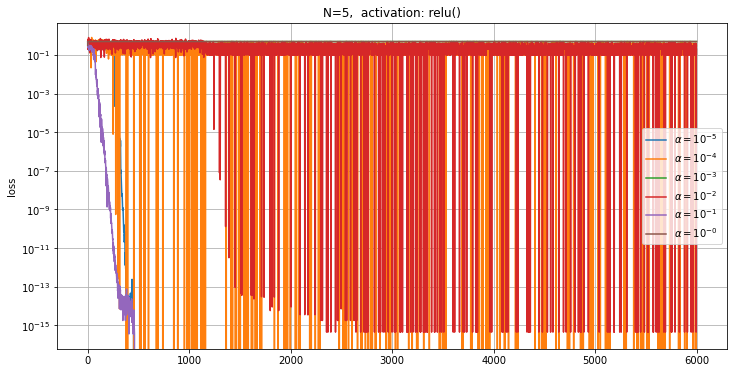

In [ ]:
plotting_func(losses_N5_relu, 5, 'relu', logscale=True)

The same behaviour as in the previous case is visible.

Final comparison:

In the following we then compare the different cases. For each case we take the mean of the last 10 loss values for each learning rate. We then plot the mean loss for each case as a function of the learning rate $\alpha$.

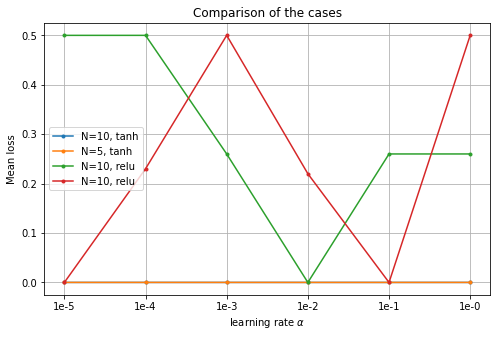

In [ ]:
x = [0, 1, 2, 3, 4, 5]
plt.figure(figsize=(8,5))
plt.title('Comparison of the cases')
plt.plot(mean_N10_tanh, '.-', label='N=10, tanh')
plt.plot(mean_N5_tanh, '.-', label='N=5, tanh')
plt.plot(mean_N10_relu, '.-', label='N=10, relu')
plt.plot(mean_N5_relu, '.-', label='N=10, relu')
my_xticks = ['1e-5', '1e-4', '1e-3', '1e-2','1e-1', '1e-0']
plt.xticks(x, my_xticks)
plt.xlabel(r'learning rate $\alpha$')
plt.ylabel('Mean loss')
plt.legend()
plt.grid()
plt.show()

As already seen from the loss plots of the whole training process, the cases with the $tanh$ activation produce the best results for $N=10$ and $N=5$. The mean loss is low for all training rates. For the cases with the $relu$ activation the mean loss drops to zero only for specific learning rates. Again, there are no huge differences betwenn $N=10$ and $N=5$. In general, the $relu$ activation works best with learning rates between $\alpha=10^{-3}$ and $\alpha=10^{-1}$. This is an expected behaviour as too small and too large learning rates normally are not able to produce good training results. <br>
In summary, the $tanh$ cases work better than the $relu$ cases and the choice of the number of neurons is not really relevant here, as probably for this task $N=5$ is already completely sufficient.